In [34]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt

In [35]:
df = pd.read_excel("Monetary_transmission_data_I.xlsx")

df.head()

,DATE,CPI,EXR,M2b,NCG,RSV,SLFR,EXP,IMP,BRNT
0,2006-01-01,60.758363,102.13093,1.040543e+06,256899.228889,2.52,10.25,440.3,680.309348,63.311818
1,2006-02-01,61.304506,102.19475,1.058934e+06,262274.756608,2.60,10.25,537.6,747.826959,60.805500
2,2006-03-01,61.304506,102.67898,1.069380e+06,264277.591736,2.56,10.25,541.1,874.638470,62.746957
3,2006-04-01,62.214744,102.66311,1.084657e+06,268478.692069,2.58,10.25,501.7,774.483974,70.340000
4,2006-05-01,63.261517,102.33710,1.080177e+06,270188.660945,2.53,10.25,509.4,938.213814,70.510000


In [36]:
df['log_EXR'] = np.log(df['EXR']) #converting to log form

In [37]:
df['dlog_EXR'] = df['log_EXR'].diff() #compute monthly percentage changes

In [38]:
df_clean = df.dropna().copy()
df_clean[['DATE', 'dlog_EXR']].head() #removing missing values

,DATE,dlog_EXR
1,2006-02-01,0.000625
2,2006-03-01,0.004727
3,2006-04-01,-0.000155
4,2006-05-01,-0.003181
5,2006-06-01,0.011413


In [39]:
# creating categories (core of ncg) :making our project non parametric
conditions = [
    df_clean['dlog_EXR'] > 0.01,
    (df_clean['dlog_EXR'] > 0) & (df_clean['dlog_EXR'] <= 0.01),
    (df_clean['dlog_EXR'] >= -0.005) & (df_clean['dlog_EXR'] <= 0),
    (df_clean['dlog_EXR'] < -0.005) & (df_clean['dlog_EXR'] >= -0.01),
    df_clean['dlog_EXR'] < -0.01
]

labels = [
    'Strong Depreciation',
    'Mild Depreciation',
    'Stable',
    'Mild Appreciation',
    'Strong Appreciation'
]

df_clean['EXR_Category'] = np.select(conditions, labels, default='Stable')

In [40]:
# Checking frequency table
observed = df_clean['EXR_Category'].value_counts().sort_index()
observed


,count
EXR_Category,
Mild Appreciation,9
Mild Depreciation,101
Stable,56
Strong Appreciation,22
Strong Depreciation,42


In [41]:
# Expected frequencies (Null Hypothesis)
n = observed.sum()
expected = np.repeat(n / len(observed), len(observed))

In [42]:
# Chi-Square Goodness-of-Fit Test
chi_stat, p_value = chisquare(f_obs=observed.values,
                              f_exp=expected)

chi_stat, p_value

(np.float64(110.56521739130434), np.float64(5.513689647023015e-23))

Significance level: α = 0.05

If p-value < 0.05 → Reject H₀
The chi-square goodness-of-fit test yields a p-value less than 0.05, indicating that monthly exchange rate changes are not uniformly distributed across depreciation and appreciation categories. This suggests asymmetric exchange rate behavior over the study period.

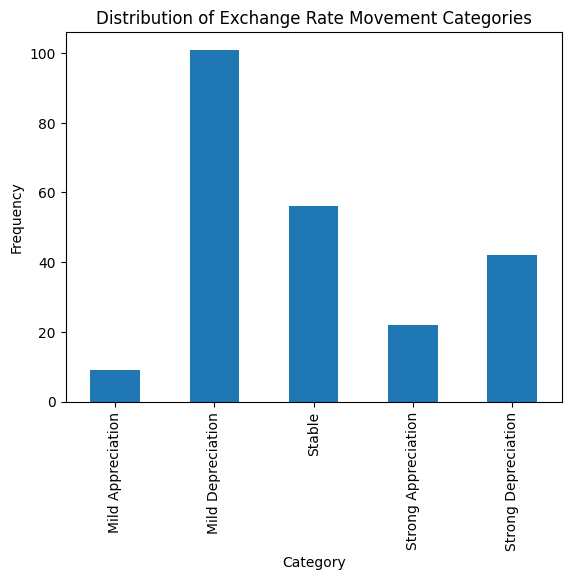

In [43]:
observed.plot(kind='bar')
plt.title("Distribution of Exchange Rate Movement Categories")
plt.ylabel("Frequency")
plt.xlabel("Category")
plt.show()
